# What is Model Selection?

When working with data and building a model such as Polynomial Regression, one of the most important questions is:

`"What degree of the polynomial best fits the data?"`

Choosing an inappropriate polynomial degree (order) can lead to one of two issues:

* The model might be too simple → Underfitting

* Or too complex and misleading → Overfitting

#  Underfitting (Poor Generalization — Model Too Simple)
Underfitting occurs when the model is too simplistic to capture the underlying patterns in the data.

**Example:**

Suppose your data follows a sinusoidal pattern.

But you try to model it using a straight line (Linear Model).

Outcome: High error — the model fails to “understand” the data.

Underfitting = The model doesn’t understand enough.

# Overfitting (Excessive Generalization — Model Too Complex)
Overfitting happens when the model is too flexible and starts learning even the random noise in the data.

Instead of learning the true relationship between x and y, it focuses on irrelevant details that occurred by chance.

**Example:**

You have noisy data and you use a Polynomial of degree 16.

The model tries to perfectly pass through every training point.

Result: Excellent performance on the training data, but it fails on unseen data.

Overfitting = The model memorizes, but doesn’t truly understand.


# How Do We Choose the Best Polynomial Degree?
We use the R² Score (Coefficient of Determination):

The closer R² is to 1 → the better the model fits.

But if the degree becomes too high → R² may decrease due to overfitting.

In [8]:
# Example | Choose the Best Polynomial Degree
import numpy as np
import pandas as pd

np.random.seed(42)

horsepower = np.array([80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460])
price = 10000 + (horsepower * 80) + np.random.normal(0, 1500, size=horsepower.shape)

df = pd.DataFrame({'horsepower': horsepower, 'price': price})

df.head()

,horsepower,price
0,80,17145.071230
1,100,17792.603548
2,120,20571.532807
3,140,23484.544785
4,160,22448.769938


In [9]:
x_data = df[['horsepower']]
y_data = df['price']

In [10]:
# Train/Test Split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.3,random_state=42)

Degree 1: R^2 = 0.9758218104992015
Degree 2: R^2 = 0.9747986457569471
Degree 3: R^2 = 0.9736061370775385
Degree 4: R^2 = 0.9729175536721012
Degree 5: R^2 = 0.9142750454840005
Degree 6: R^2 = 0.9623304398420202
Degree 7: R^2 = 0.972320707078406
Degree 8: R^2 = 0.9708676199149697
Degree 9: R^2 = 0.9636780592738516
Degree 10: R^2 = 0.9520705692010872


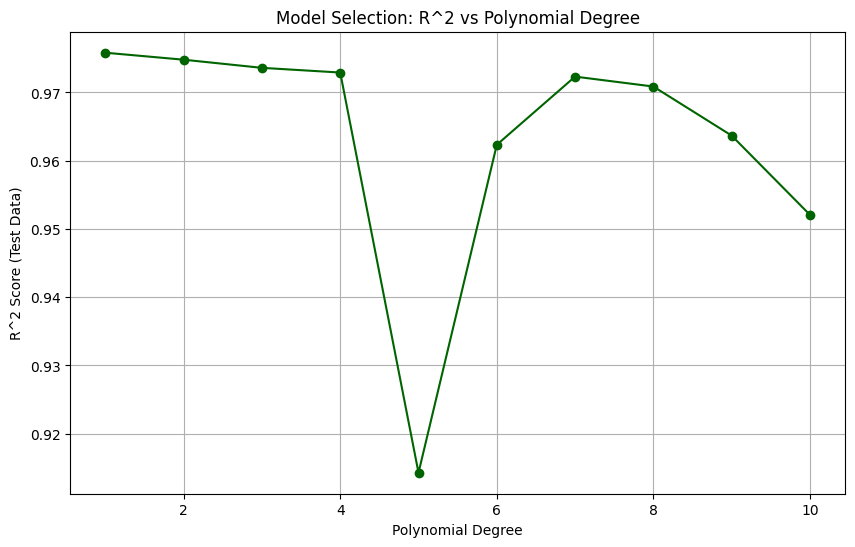

In [11]:
# Polynomial Degrees Experiment Code and R² Score Calculation:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# List of polynomial grades that i will try
degrees = list(range(1, 11))
r2_scores = []

for d in degrees:
  poly = PolynomialFeatures(degree=d)
  x_train_poly = poly.fit_transform(x_train)
  x_test_poly = poly.transform(x_test)

  model = LinearRegression()
  model.fit(x_train_poly,y_train)
  y_pred = model.predict(x_test_poly)

  r2 = r2_score(y_test,y_pred)
  r2_scores.append(r2)

for i, score in enumerate(r2_scores):
  print(f"Degree {degrees[i]}: R^2 = {score}")


plt.figure(figsize=(10,6))
plt.plot(degrees, r2_scores, marker='o', linestyle='-', color='darkgreen')
plt.xlabel('Polynomial Degree')
plt.ylabel('R^2 Score (Test Data)')
plt.title('Model Selection: R^2 vs Polynomial Degree')
plt.grid(True)
plt.show()

From degree 1 to 4 → the model remains stable with a high R² score (around 0.97).

At degree 5 → there is a sharp drop in the R² score, indicating clear overfitting.

Beyond degree 6 → the model tries to "compensate," but performance gradually deteriorates as the degree increases (i.e., overfitting worsens).

#  What does this mean?

The optimal model appears to be around degree 3 or 4.

Any higher degree → the model starts to learn and memorize noise.

The sudden drop at degree 5 is a strong indicator that the model becomes overly sensitive to noise in the data.